# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous le nom, le prénom et le numéro étudiant de chaque membre du binôme :
</div>

In [ ]:
# NOM-1 Prénom-1 NuméroEtud-1
#Elio Samaha : 21105733
# NOM-2 Prénom-2 NuméroEtud-2
#Justin Carel : 21102190

# TME 06Y - Lois discrètes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1 - Observations sur la loi de Bernoulli

<div class="alert alert-block alert-warning">
Dans cette première partie, nous allons effectuer des tirages aléatoires indépendants selon une loi de Bernoulli et représenter la moyenne empirique et la variance empririque en fonction du nombre de tirages.
</div>

<div class="alert alert-block alert-info">
Q1.1 - Définir la fonction <code>ber</code> qui prend en paramètres une réalisation <code>x</code> (entier 0 ou 1) et une probabilité de succès <code>pi</code> et qui renvoie la probabilité de <code>x</code> selon la loi de Bernoulli $\mathcal{B}(\pi)$.
</div>

In [2]:
def ber(x , pi):
    return pi**x * (1 - pi)**(1-x)

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour visualiser la loi de Bernoulli $\mathcal{B}(\pi)$.
</div>

In [3]:
np.array([ber(0, 0.8), ber(1, 0.8)])

array([ 0.2,  0.8])

<div class="alert alert-block alert-info">
Q1.2 - Définir la fonction <code>ber_tirage_simple</code> qui prend en paramètre une probabilité de succès <code>pi</code> et qui renvoie le résultat d'un tirage aléatoire selon la loi de Bernoulli $\mathcal{B}(n, \pi)$.
    
Pour cela, on utilisera <code>np.random.rand()</code> qui tire un nombre pseudo-aléatoire uniformément dans $[0, 1[$ et le renvoie.
</div>

In [4]:
def ber_tirage_simple(pi):
    r = np.random.rand()
    if r < ber(1 , pi):
        return 1
    return 0

<div class="alert alert-block alert-info">
Exécuter plusieurs fois le bloc suivant pour voir les résultats d'une série de tirages avec une probabilité de succès $\pi = 0.8$.
</div>

In [5]:
[ber_tirage_simple(0.8) for _ in range(10)]

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1]

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour voir un moyen rapide de convertir un tableaux de booléens en tableau d'entiers.
</div>

In [6]:
np.array([False, False, True, False]) + 0

array([0, 0, 1, 0])

<div class="alert alert-block alert-info">
Q1.3 - Définir la fonction <code>ber_tirages</code> qui prend en paramètres une probabilité de succès <code>pi</code> et un nombre d'exprériences <code>nexp</code> et qui renvoie le résultat de <code>nexp</code> tirages indépendants selon la loi de Bernoulli $\mathcal{B}(\pi)$.
    
<code>np.random.rand(n)</code> renvoie un vecteur de valeurs pseudo-aléatoires de taille $n$.
</div>

In [7]:
def ber_tirages(pi , nexp):
    return (np.random.rand(nexp) < ber(1 , pi)) + 0

<div class="alert alert-block alert-info">
Q1.4 - Effectuer 20 tirages indépendants selon la loi de Bernoulli $\mathcal{B}(\frac{8}{10})$.
</div>

In [9]:
ber_tirages(0.8 , 20)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

<div class="alert alert-block alert-info">
Q1.5 - Écrire une fonction <code>freq_succes</code> qui, étant donné une probabilité <code>pi</code> et un nombre d'expériences <code>nexp</code>, renvoie renvoie la moyenne empririque de succès de <code>nexp</code> tirages aléatoires indépendants selon $\mathcal{B}(\pi)$
</div>

In [10]:
def freq_succes(pi , nexp):
    return ber_tirages(pi , nexp).sum() / nexp

<div class="alert alert-block alert-info">
Q1.6 - Écrire une fonction <code>dessin_freq</code> qui, étant donné une probabilité <code>pi</code> et un nombre maximal d'expériences <code>nmax</code>, affiche le graphique du nuage de points de la fréquence en fonction du nombre d'expériences en 1 et <code>nmax</code> ainsi que la droite d'équation $y = \pi$.
</div>

In [11]:
def dessin_freq(pi , nmax):
    plt.scatter(range(1 , nmax + 1) , [freq_succes(pi , n) for n in range(1, nmax + 1)])
    plt.plot([0 , nmax] , [pi , pi] , color = "red")

<div class="alert alert-block alert-info">
Appliquer la fonction précédente pour voir le graphique.
</div>

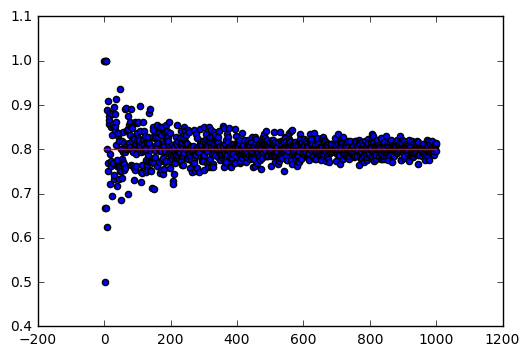

In [12]:
dessin_freq(0.8, 1000)

<div class="alert alert-block alert-info">
Q1.7 - De même, écrire la fonction <code>variance_succes</code> pour la variance empirique.

Remarque : il s'agit d'un estimatieur biaisé de la variance.
</div>

In [13]:
def variance_succes(pi , nexp):
    tirage = ber_tirages(pi , nexp)
    return np.mean(tirage) - np.mean(tirage)**2

<div class="alert alert-block alert-info">
Q1.8 - De même, écrire la fonction <code>dessin_variance</code> qui produit le même type de graphique que <code>dessin_freq</code> mais pour la variance.
</div>

In [16]:
def dessin_variance(pi , nmax):
    plt.scatter(range(1 , nmax + 1) , [variance_succes(pi , n) for n in range(1, nmax + 1)])
    plt.plot([0 , nmax] , [pi*( 1 - pi) , pi*( 1 - pi)] , color = "red")

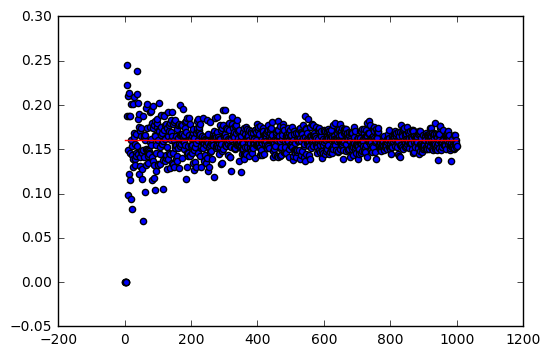

In [17]:
dessin_variance(0.8, 1000)

## 2 - Observations sur la loi binomiale

<div class="alert alert-block alert-info">
Q2.1 - Écrire la fonction <code>binomiale_tirages</code> qui, étant donné les paramètres <code>n</code> et <code>pi</code> et un nombre d'expériences <code>nexp</code>, renvoie un vecteur de <code>nexp</code> tirages indépendants selon la loi binomiale $\mathcal{B}(n, \pi)$.
    
Pour effectuer un tirage selon la loi binomiale, on pourra effectuer $n$ tirages selon une loi de Bernoulli.
</div>

In [29]:
def binomiale_tirages(n , pi , nexp):
    return [ber_tirages(pi , n).sum() for _ in range(nexp)]


<div class="alert alert-block alert-info">
Q2.2 - Écrire une fonction <code>binomiale_effectifs</code> qui, étant donné les paramètres <code>n</code> et <code>pi</code> et un nombre d'expériences <code>nexp</code>, renvoie un vecteur de taille $n + 1$ comptant les effectifs des réalisations de la loi binomiale.
</div>

In [22]:
def binomiale_effectifs(n , pi , nexp):
    hello = binomiale_tirages(n , pi , nexp)
    return np.array([hello.count(k) for k in range(n+1)])

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour créer un vecteur correspondant au 21 réalisation possibles d'une variable aléatoire qui suit une loi binomiale de paramètre 20.
</div>

In [25]:
np.arange(0, 21, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

<div class="alert alert-block alert-info">
    Q2.3 - Écrire la fonction <code>dessin_binomiale</code> qui, étant donné les paramètres <code>n</code> et <code>pi</code> et un nombre d'expériences <code>nexp</code>, affiche l'histogramme des effectifs obtenus pour chaque réalisation.
</div>

In [27]:
def dessin_binomiale(n , pi , nexp):
    plt.bar(range(n+1), binomiale_effectifs(n , pi , nexp) , edgecolor = "black")

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour tester votre fonction.
</div>

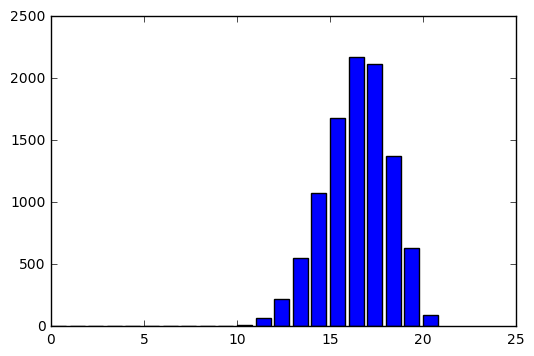

In [32]:
dessin_binomiale(20, 0.8, 10000)

## 3 - Loi jointe

<div class="alert alert-block alert-warning">
On reprend la loi de probabilité jonte du TME précédent.

Soit deux variables aléatoires $X$ et $Y$ qui suivent la loi de probabilité jointe suivante :
$$
    \begin{array}{c|cccc}
      p_{XY}(x, y) & 0 & 1 & 2 & 3 \\
      \hline
      0 & \frac{9}{32} & \frac{3}{32} & \frac{1}{32} & \frac{7}{32} \\
      1 & \frac{1}{32} & \frac{2}{32} & \frac{8}{32} & \frac{1}{32}
    \end{array}
$$
</div>

<div class="alert alert-block alert-info">
Q3.1 - Calculer la loi marginale de $p_X$ ainsi que la loi conditionnelle $p_{Y|X}$.
</div>

In [64]:
pxy = [
    [9/32, 3/32, 1/32, 7/32],
    [1/32, 2/32, 8/32, 1/32]
]

pxy = np.array(pxy)
px = np.sum(pxy, axis = 1)
py = np.sum(pxy, axis = 0)
pySx = np.array([ pxy[i, :] / pxi for i, pxi in enumerate(px)])

pySx[0, :]

array([ 0.45,  0.15,  0.05,  0.35])

<div class="alert alert-block alert-warning">
Nous savons déjà tirer selon $p_X$ puisqu'il s'agit d'une loi de Bernoulli.

Pour tirer selon $p_{Y|X}$, nous allons commencer par calculer la fonction de répartition.
</div>

<div class="alert alert-block alert-info">
Q3.2 - Écrire une fonction <code>repartition</code> qui, étant donné une loi de probabilité discrète sous la forme d'un vecteur, renvoie la fonction de répartition (probabilités cumulées) sous la forme d'un vecteur de même taille.
</div>

In [39]:
def repartition(p):
    return [np.sum(p[:i]) for i in range(1, len(p)+1)]

<div class="alert alert-block alert-info">
Q3.3 - À l'aide de la fonction précédente, écrire une fonction <code>tirage</code> qui, étant donné une loi de probabilité sous la forme d'un vecteur, renvoie l'indice du vecteur tiré aléatoirement compte tenu des probabilités.
</div>

In [40]:
def tirage(p):
    r = np.random.rand()
    for i, pcumul in enumerate(repartition(p)):
        if r < pcumul:
            return i
    
    raise Exception('p is not a probability')

<div class="alert alert-block alert-info">
Q3.4 - À l'aide d'un grand nombre de tirages, vérifier si les fréquences se rapprochent des probabilités théoriques.
</div>

In [49]:
def ntirages(p, n):
    return [tirage(p) for _ in range(n)]

def count(p, n):
    tirages = ntirages(p, n)
    return np.array([tirages.count(i) for i in range(len(p))])

def freq(p, n):
    return count(p, n) / n

In [59]:
x = 0
print(pySx[x, :])
print(freq(pySx[x, :], 10000))

[ 0.45  0.15  0.05  0.35]
[ 0.4438  0.1479  0.0502  0.3581]


In [60]:
x = 1
print(pySx[x, :])
print(freq(pySx[x, :], 10000))

[ 0.08333333  0.16666667  0.66666667  0.08333333]
[ 0.0851  0.1748  0.6607  0.0794]
